In [17]:
import pandas as pd
import numpy as numpy
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score, classification_report
import requests
from io import BytesIO



In [7]:
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"

response = requests.get(url)
data = BytesIO(response.content)

X, y = load_svmlight_file(data)

df = pd.DataFrame(X.toarray())
df['outcome'] = y               



In [8]:
y = df['outcome']
X = df.drop(['outcome'], axis = 1)

In [9]:
#check the data
X.isnull().sum() 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [23]:
nnModel = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20,10,4), random_state=1, max_iter = 2000)
nnModel.fit(X,y)
#using NLPClassifier and choosing 3-layers


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10, 4), max_iter=2000,
              random_state=1, solver='lbfgs')

In [24]:
y_pred = nnModel.predict(X)
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)


In [32]:
print(f'Accuracy of the model: {accuracy*100:.2f}%')
print('\nReport:')
print(report)

Accuracy of the model: 92.45%

Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.87      0.89       268
         1.0       0.93      0.95      0.94       500

    accuracy                           0.92       768
   macro avg       0.92      0.91      0.92       768
weighted avg       0.92      0.92      0.92       768



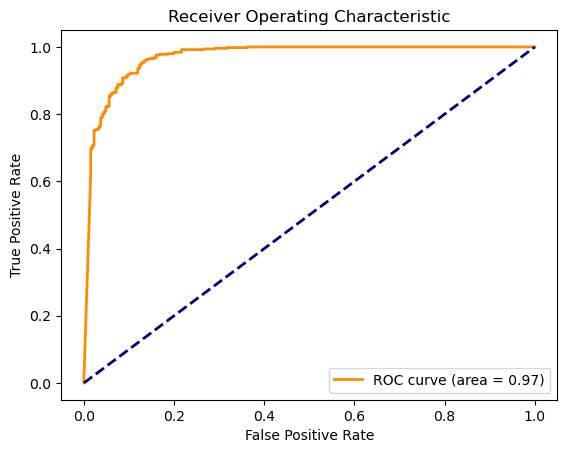

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_probs = nnModel.predict_proba(X)[:,1]
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc = roc_auc_score(y, y_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
